# Grip : The Spark Foundation
## DATA SCIENCE AND BUSINESS ANALYTICS TASKS
### TASK 03 Exploratory Data Analysis - Retail
### Author : PRAJWAL N

#### In this task we are going to perform EDA process on Sample Super Dataset

#### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = "ignore")

#### Importing the dataset

In [2]:
data = pd.read_csv("C:\\Users\\PRAJJU\\Desktop\\GL EXERCISES\\The Spark Foundation\Task 3\\SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


#### Cleaning and Understanding the charateristics of the dataset

In [4]:
data.shape

(9994, 13)

In [5]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [7]:
data.duplicated().sum()

17

In [8]:
data = data.drop_duplicates()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [10]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [11]:
print("Ship Mode: ",data["Ship Mode"].unique())
print("Segment :",data["Segment"].unique())
print("Country :",data["Country"].unique())
print("Region :",data["Region"].unique())
print("Category :",data["Category"].unique())
print("Sub-Category :",data["Sub-Category"].unique())

Ship Mode:  ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment : ['Consumer' 'Corporate' 'Home Office']
Country : ['United States']
Region : ['South' 'West' 'Central' 'East']
Category : ['Furniture' 'Office Supplies' 'Technology']
Sub-Category : ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [12]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


#### Analysing the dataset by performing some functions

##### Top 5 cities having highest Sales

In [13]:
high_sales = pd.pivot_table(data=data,values="Sales",index="City",aggfunc="sum")
high_sales = high_sales.sort_values(by="Sales",ascending=False)
high_sales.head()
# New york city has the highest sales

,Sales
City,
New York City,256319.041
Los Angeles,175831.901
Seattle,119460.282
San Francisco,112577.172
Philadelphia,109061.461


##### Top 5 cities having highest Profit

In [14]:
high_profit = pd.pivot_table(data=data,values="Profit",index="City",aggfunc="sum")
high_profit = high_profit.sort_values(by="Profit",ascending=False)
high_profit.head()
# New york city has the highest profit

,Profit
City,
New York City,62013.8973
Los Angeles,30431.4267
Seattle,29121.6825
San Francisco,17466.1186
Detroit,13146.6935


##### Profitable Category

In [15]:
profit_cat = data.groupby("Category")["Profit"].sum()
profit_cat = profit_cat.sort_values(ascending=False)
profit_cat.head().to_frame()
#Technology boasts the highest profit

,Profit
Category,
Technology,145454.9481
Office Supplies,122364.6608
Furniture,18421.8137


##### Highest Sales by Region

In [16]:
sales_region = data.groupby("Region")["Sales"].sum()
sales_region = sales_region.sort_values(ascending=False)
sales_region.head().to_frame()
# West region has the highest sales

,Sales
Region,
West,725255.6365
East,678435.1960
Central,500782.8528
South,391721.9050


##### The cities which are in loss

In [17]:
high_profit = pd.pivot_table(data=data,values="Profit",index="City",aggfunc="sum")
high_profit = high_profit.sort_values(by="Profit",ascending=False)
high_profit.tail()
# Philadelphia has low profits

,Profit
City,
Chicago,-6648.3318
Lancaster,-7239.0684
San Antonio,-7299.0502
Houston,-10175.1755
Philadelphia,-13843.2106


#### Visualizing the dataset for better understanding of the datset

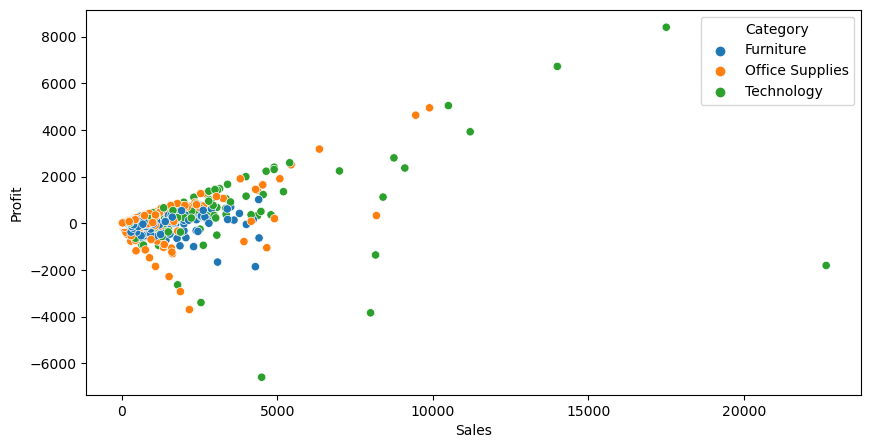

In [26]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data,x="Sales",y="Profit",hue="Category")
plt.show()

##### The scatterplot sheds light on category distribution based on profit margins.

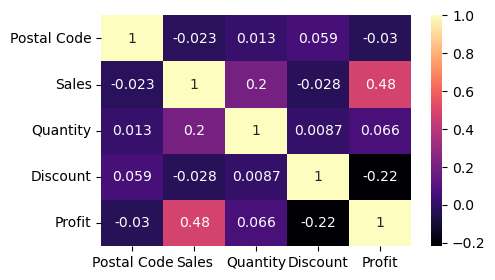

In [19]:
plt.figure(figsize=(5,3))
sns.heatmap(data=data.corr(),cmap="magma",annot=True)
plt.show()

##### The heatmap effectively illustrates strong correlations among dataset characteristics.

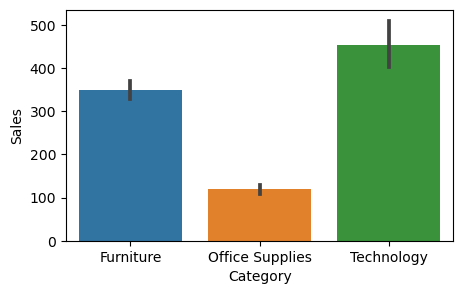

In [20]:
plt.figure(figsize=(5,3))
sns.barplot(data=data,x="Category",y="Sales")
plt.show()

##### The bar plot highlights that the that Technology boasts the highest sales.

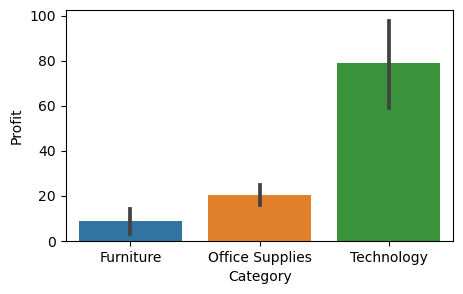

In [21]:
plt.figure(figsize=(5,3))
sns.barplot(data=data,x="Category",y="Profit")
plt.show()

#####  Additionally, the same plot indicates that Technology category stands out with the highest profitability among all categories.

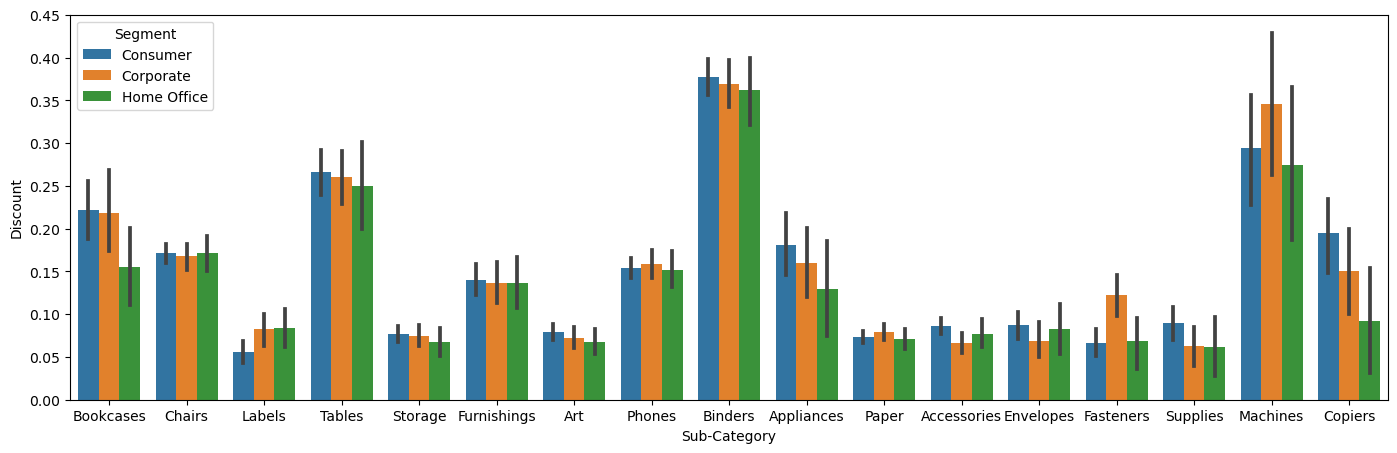

In [22]:
plt.figure(figsize=(17,5))
sns.barplot(data=data,y="Discount",x="Sub-Category",hue="Segment")
plt.show()

##### Notably, the Binders sub-category exhibits significant discounts, particularly in certain segments.

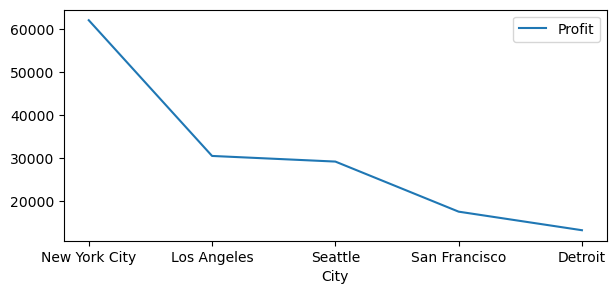

In [23]:
plt.figure(figsize=(7,3))
sns.lineplot(data=high_profit.head())
plt.show()

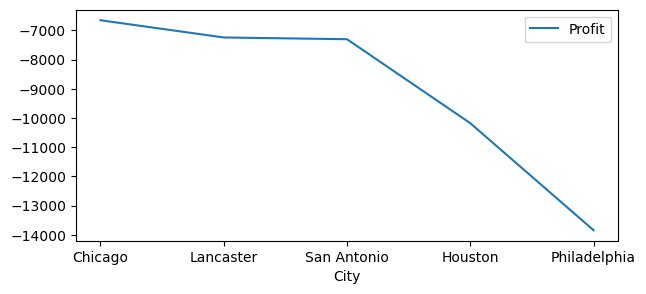

In [24]:
plt.figure(figsize=(7,3))
sns.lineplot(data=high_profit.tail())
plt.show()

##### It reveals which cities are driving high and low profits

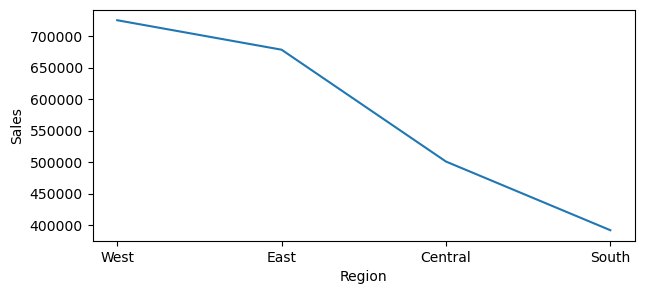

In [25]:
plt.figure(figsize=(7,3))
sns.lineplot(data=sales_region.head())
plt.show()

##### The line plot provides a regional breakdown of sales performance.

## Thank You